In [ ]:
#get libaries
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
import random as rand


In [ ]:
#data files
mouse_path_csv = './Resources/Mouse_metadata.csv'
study_results_csv = './Resources/Study_results.csv'


#dataframes
mouse_metadata_df = pd.read_csv(mouse_path_csv)
study_results_df = pd.read_csv(study_results_csv)

#merge the dataframes together on Mouse ID
merged_df = pd.merge(study_results_df, mouse_metadata_df, how='left', on=['Mouse ID', 'Mouse ID'])



<p>Remove duplicate mouse ID timepoint values</p>

In [ ]:
#cleaning out duplicate values from merged dataframe
duplicate_mice = merged_df[merged_df.duplicated(subset=['Mouse ID','Timepoint'], keep=False)]['Mouse ID'].unique()

#remove the duplicate mice from the merged dataframe and create a new clean dataframe
clean_df = merged_df[~merged_df['Mouse ID'].isin(duplicate_mice)]


In [22]:
clean_df['Mouse ID'].sort_values().unique()

array(['a203', 'a251', 'a262', 'a275', 'a366', 'a401', 'a411', 'a444',
       'a457', 'a492', 'a520', 'a577', 'a644', 'a685', 'a699', 'a788',
       'a818', 'a897', 'a963', 'b128', 'b313', 'b447', 'b487', 'b559',
       'b742', 'b759', 'b879', 'c139', 'c264', 'c282', 'c302', 'c326',
       'c402', 'c458', 'c559', 'c580', 'c757', 'c758', 'c766', 'c819',
       'c832', 'c895', 'c927', 'd133', 'd164', 'd251', 'd474', 'e213',
       'e227', 'e291', 'e476', 'e584', 'e662', 'f129', 'f234', 'f278',
       'f345', 'f394', 'f436', 'f545', 'f932', 'f966', 'f993', 'g107',
       'g288', 'g296', 'g316', 'g497', 'g558', 'g570', 'g791', 'g867',
       'h246', 'h333', 'h428', 'h531', 'i177', 'i334', 'i386', 'i477',
       'i557', 'i635', 'i669', 'i738', 'i901', 'j119', 'j235', 'j246',
       'j296', 'j365', 'j755', 'j913', 'j984', 'j989', 'k210', 'k382',
       'k403', 'k483', 'k510', 'k603', 'k754', 'k804', 'k862', 'k894',
       'l215', 'l264', 'l471', 'l490', 'l509', 'l558', 'l661', 'l700',
      

<p>Summary Stats using Pandas Series passed into a dataframe</p>

In [ ]:
#get drug group
drug_df = clean_df.groupby('Drug Regimen')

#calculate the mean tumor volume for each drug group
mean_tumor_volume = drug_df['Tumor Volume (mm3)'].mean()

#calculate the median tumor volume for each drug group
median_tumor_volume = drug_df['Tumor Volume (mm3)'].median()

#calculate the variance of tumor volume for each drug group
var_tumor_volume = drug_df['Tumor Volume (mm3)'].var()

#calculate the std dev for tumor volume for each drug group
std_tumor_volume = drug_df['Tumor Volume (mm3)'].std()

#calculate the std err for tumor volume for each drug group
sem_tumor_volume = drug_df['Tumor Volume (mm3)'].sem()

#put series into a new dataframe
summary_stats = pd.DataFrame({
    'Mean Tumor Volume':mean_tumor_volume,
    'Median Tumor Volume':median_tumor_volume,
    'Tumor Volume Variance':var_tumor_volume,
    'Tumor Volume Std. Dev.':std_tumor_volume,
    'Tumor Volume Std. Err.':sem_tumor_volume
})

#show the dataframe
summary_stats



##### Summary Stats using .aggregate method from Pandas

In [ ]:
#does the same as above, except uses built in aggregrate function with pandas to reduce lines of code and increase efficiency
agg_summary_stats = drug_df['Tumor Volume (mm3)'].aggregate(['mean','median','var','std','sem'])

#show the aggregate function dataframe
agg_summary_stats

## Bar Charts

##### Pandas .plot Bar Chart
---


<Axes: title={'center': '# of Observed Mice Timepoints per Drug Regimen'}, xlabel='Drug Regimen', ylabel='# of Observed Mice Timepoints'>

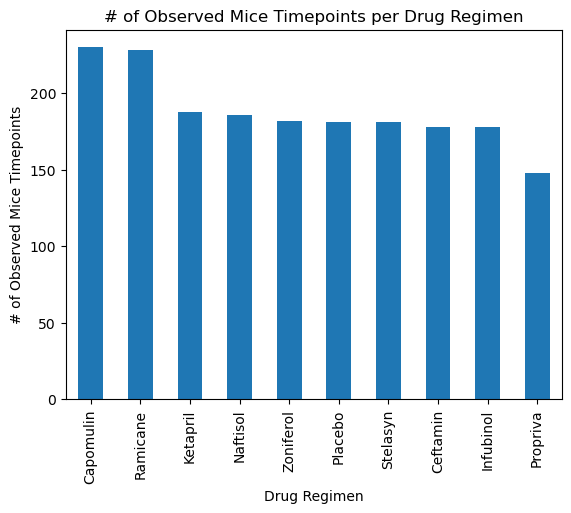

In [9]:

#Chart the count of Mouse IDs off of the grouped drug_df. Then plot the results into a bar chart using pandas .plot
drug_df['Mouse ID'].count().sort_values(ascending=False).plot(kind='bar', 
                                                              title='# of Observed Mice Timepoints per Drug Regimen',
                                                              xlabel='Drug Regimen',
                                                              ylabel='# of Observed Mice Timepoints')


##### MatPlotLib PyPlot Bar Chart
---

Text(0.5, 1.0, '# of Observed Mice Timepoints per Drug Regimen')

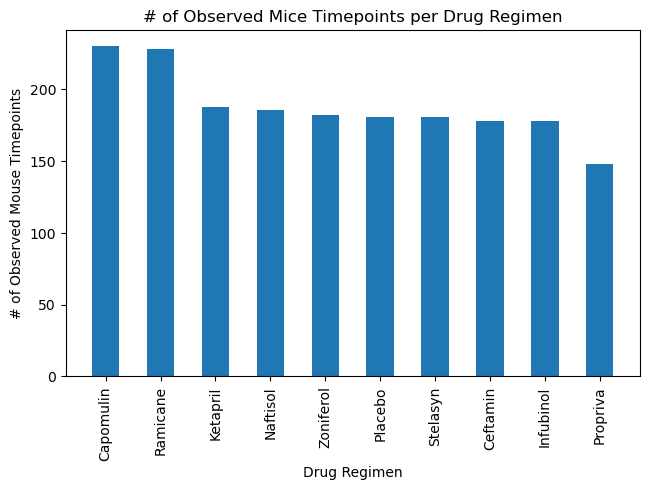

In [8]:
#Chart the count of Mouse IDs off of the grouped drug_df. Then plot the results into a bar chart using MatPlotLib.PyPlot
mouse_counts = drug_df['Mouse ID'].count()

#sort the values to make the chart cleaner
mouse_counts = mouse_counts.sort_values(ascending=False)


#plot the chart
plt.bar(np.arange(0,len(mouse_counts),1),mouse_counts, width=.5)
plt.xticks(ticks=np.arange(0,len(mouse_counts),1),labels=mouse_counts.index,rotation=90)
plt.xlabel('Drug Regimen')
plt.tight_layout()
plt.ylabel('# of Observed Mouse Timepoints')
plt.title('# of Observed Mice Timepoints per Drug Regimen')




## Pie Charts


#### Pandas Pie Chart 
---
<p> I want to note, if you calculate with the duplicate mouse ID you get the Pie chart in the Starter Code, if you exclude that record, you get the following</p>

In [ ]:
#Create a series of the type of gender and the unique count of Mouse ID per gender

#the commented code below will give you the same percentages as the starter code,
# if that is what you are looking for, my results exclude the duplicate Mouse ID found in the steps above
#mouse_gender = merged_df.groupby('Sex)

#create groupby series
mouse_gender = clean_df.groupby('Sex')

#plot as a pie chart
mouse_gender['Mouse ID'].count().plot(kind='pie',shadow=True, autopct="%1.1f%%", title='Male vs Female Among Trial mice', startangle=180,ylabel='count')





#### MatPlotLib Pie Chart
---

In [ ]:
fig,ax = plt.subplots()

#labels for the pie chart is the groupby series index
labels = mouse_gender['Mouse ID'].count().index

#plot pie chart added some extra colors for fun
plt.pie(mouse_gender['Mouse ID'].count(), autopct="%1.1f%%", labels=labels, startangle=180, colors=['pink','blue'])
ax.set_ylabel('count')

## Quartiles, Outliers, and Boxplots

### Boxplot
---

Capomulin's potential outliers: []
Ramicane's potential outliers: []
Infubinol's potential outliers: [36.3213458]
Ceftamin's potential outliers: []


Text(0.5, 1.0, 'Final Tumor Volume per Drug Regimen')

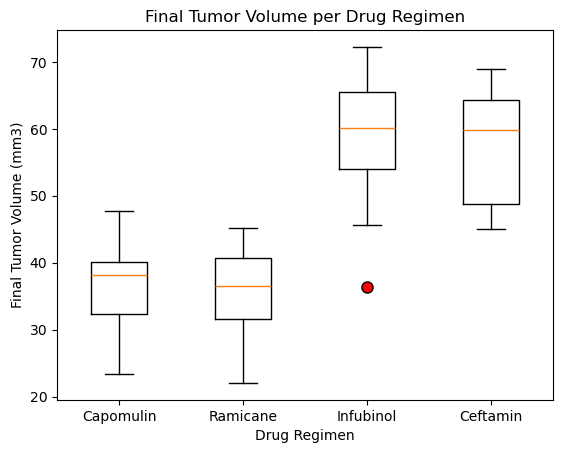

In [12]:
#group by Mouse ID, grab the max timepoint for each Mouse ID
tumor_volume_timepoint_df = pd.DataFrame(merged_df.groupby('Mouse ID')['Timepoint'].max()).reset_index().rename(columns={'Timepoint':'max_timepoint'})

#merge with cleaned dataframe
tumor_volume_df = pd.merge(merged_df,tumor_volume_timepoint_df,on='Mouse ID')

#list of drug names to loop through
drugs = ['Capomulin','Ramicane','Infubinol','Ceftamin']
#empty list to append the values to for the boxplot
values = []


#loops through list of drugs
for drug in drugs:
    #create a temporary dataframe to filter down the the specific drug we are on
    current_drug = tumor_volume_df.loc[tumor_volume_df['Drug Regimen'] == drug]
    
    #Use the temporary dataframe to get only the max timepoint for the current drug.
    final_tp = current_drug.loc[current_drug['Timepoint'] == current_drug['max_timepoint']]
    
    #declare variable cur_vals, set it to the series of Tumor Volume from our temp DataFrames
    cur_vals = final_tp['Tumor Volume (mm3)']
        
    #append the value to the values list
    values.append(cur_vals)
      
    #calculate quarties, lowerq, upperq, iqr, lower_bound, upper_bound, and outliers
    quartiles = cur_vals.quantile([.25,.5,.75])
    lowerq = quartiles[.25]
    upperq = quartiles[.75]
    iqr = upperq-lowerq
    
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    
    #create a list of the outliers for each drug
    outliers = [x for x in cur_vals if x > upper_bound or x < lower_bound]
    
    #print out the list of outliers for each drug
    print(f'{drug}\'s potential outliers: {outliers}')



#this allows us to set the properties of the fliers (outliers) of our boxplot
flierprops = dict(marker='o', markerfacecolor='red', markersize=8,
                  linestyle='none')


#subplot initilization
fig1,ax1 = plt.subplots()
#creating the boxplot, passing is the values list
ax1.boxplot(values,flierprops=flierprops)
#set the labels = drugs list
ax1.set_xticklabels(drugs)
#final formatting for readability
ax1.set_ylabel('Final Tumor Volume (mm3)')
ax1.set_xlabel('Drug Regimen')
ax1.set_title('Final Tumor Volume per Drug Regimen')

Text(0, 0.5, 'Tumor Volume (mm3)')

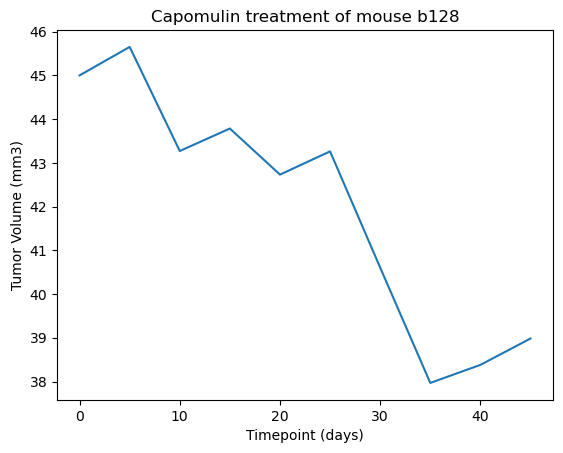

In [16]:
#declare which drug_type we'd like to drill down into
drug_type = 'Capomulin'

#create an array of the unique mouse IDs that exist for that drug
mouse_ids = clean_df.loc[clean_df['Drug Regimen'] == drug_type]['Mouse ID'].unique()

#get random mouse ID from the above array
cur_id = mouse_ids[rand.randint(0,len(mouse_ids) - 1)]

#return only the desired columns for that Mouse's ID
mouse = clean_df.loc[(clean_df['Mouse ID'] == cur_id)][['Tumor Volume (mm3)','Timepoint']]

#plot the mouses data as a line chart. 
plt.plot(mouse['Timepoint'],mouse['Tumor Volume (mm3)'])
#title will automaticaly update if the variables above are changed for the drug group and for the mouse ID it's using
plt.title(f'{drug_type} treatment of mouse {cur_id}')
plt.xlabel('Timepoint (days)')
plt.ylabel('Tumor Volume (mm3)')



Text(0.5, 1.0, 'Mouse Weight (g) vs Average Tumor Volume (mm3)')

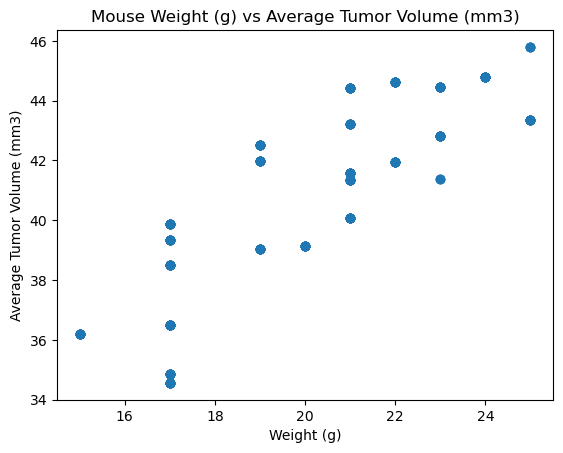

In [17]:
#Create a DataFrame that only returns records that are apart of the drug_type listed in the cell above
specific_drug_df = clean_df.loc[clean_df['Drug Regimen'] == drug_type]

#group the specific_drug_df by the mouse ID and the average tumor volume
avg_volume_df = specific_drug_df.groupby('Mouse ID')['Tumor Volume (mm3)'].mean()

#merge the 2 dataframes above on the Mouse ID, this will create a Tumor Volume (mm3)_y that has our avg tumor size
complete_avg_df = pd.merge(specific_drug_df, avg_volume_df, on='Mouse ID')

#set our x and y axis to the weight and avg tumor volume respectively
x_axis = complete_avg_df['Weight (g)']
y_axis = complete_avg_df['Tumor Volume (mm3)_y']

#plot the data in a scatter chart
plt.scatter(x_axis,y_axis)
plt.ylabel('Average Tumor Volume (mm3)')
plt.xlabel('Weight (g)')
plt.title('Mouse Weight (g) vs Average Tumor Volume (mm3)')

In [ ]:
#below is our linregress syntax. This returns the slope, intercept, rvalue, pvalue,stderr
#for our x_axis and y_axis. Currently, we are only interested in Slope and Intercept
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_axis, y_axis)
#y = Mx + b but in code, this calculates the 
regress_values = x_axis * slope + intercept
correlation = st.pearsonr(x_axis,y_axis)
plt.scatter(x_axis,y_axis)
plt.plot(x_axis, regress_values, color='red')
plt.ylabel('Average Tumor Volume (mm3)')
plt.xlabel('Weight (g)')
plt.title('Mouse Weight (g) vs Average Tumor Volume (mm3)')
print(f'The correlation between mouse weight and tumor volume is {round(correlation[0],2)}')
